In [6]:
# imports 
import pandas as pd
import numpy as np
import csv

# read file 
def read_file(filepath):
    df = pd.read_csv(filepath)
    return df

df = read_file("311.csv")


df1 = df[['ontime', 'neighborhood']]
df1.head(10)





ontime                            neighborhood
0  OVERDUE                               Hyde Park
1   ONTIME           Downtown / Financial District
2   ONTIME                              Dorchester
3  OVERDUE                               Hyde Park
4  OVERDUE                             Charlestown
5   ONTIME  South Boston / South Boston Waterfront
6   ONTIME                              Dorchester
7  OVERDUE                           Jamaica Plain
8   ONTIME           Downtown / Financial District
9   ONTIME                              Dorchester

In [7]:
# function replaces 'OVERDUE' with 0 and 'ONTIME' with 1

def to_numerical(df):
    df['ontime'].replace(['ONTIME','OVERDUE'], [1,0], inplace=True)
    return df['ontime']

df1['ontime'] = to_numerical(df)
df1.head(10)

/var/folders/28/k_0b83n90054zf3kf809sw6m0000gp/T/ipykernel_37327/3367958376.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ontime'] = to_numerical(df)


ontime                            neighborhood
0       0                               Hyde Park
1       1           Downtown / Financial District
2       1                              Dorchester
3       0                               Hyde Park
4       0                             Charlestown
5       1  South Boston / South Boston Waterfront
6       1                              Dorchester
7       0                           Jamaica Plain
8       1           Downtown / Financial District
9       1                              Dorchester

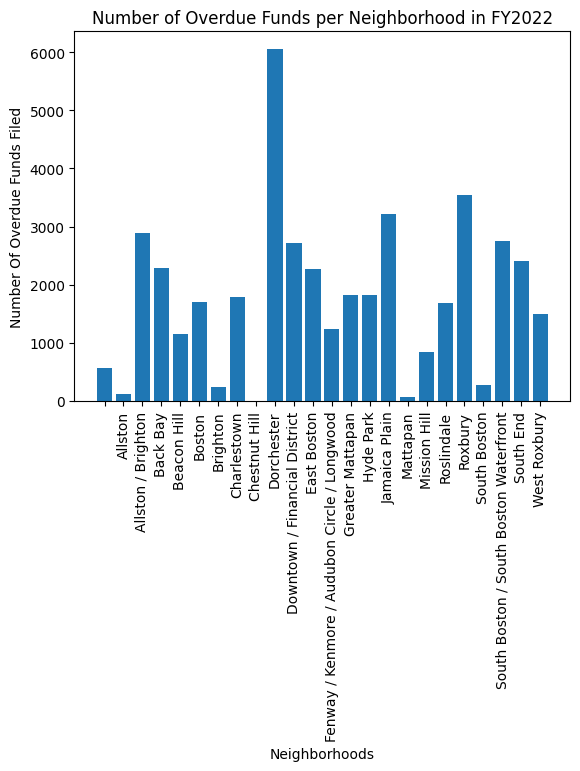

In [20]:
# grouping neighborhood and ontime 
import matplotlib.pyplot as plt
overdue = df1[df1['ontime'] == 0]
group = overdue.groupby('neighborhood')['ontime'].count()
plt.bar(group.index, group)
plt.xticks(rotation=90)
plt.title('Number of Overdue Funds per Neighborhood in FY2022')
plt.xlabel('Neighborhoods')
plt.ylabel('Number Of Overdue Funds Filed')
plt.show()

In [17]:
print('Crosstable of overdue funds and neighborhood:')
print(df1.groupby('neighborhood').ontime.value_counts())

Crosstable of overdue funds and neighborhood:
neighborhood                                  ontime
                                              1          1717
                                              0           571
Allston                                       1           610
                                              0           127
Allston / Brighton                            1         15205
                                              0          2895
Back Bay                                      1         10793
                                              0          2288
Beacon Hill                                   1          7149
                                              0          1155
Boston                                        1          7542
                                              0          1709
Brighton                                      1          1141
                                              0           247
Charlestown                      

In [31]:
import folium 
from folium.plugins import HeatMap

# 42.3601 ; 71.0588

df2 = df[['ontime', 'latitude', 'longitude']]


base_map = folium.Map(location=[42.3601, -71.0588])
hm = HeatMap(df2)
base_map.add_child(hm)
base_map


In [52]:
# Time graph overdue funds vs financial years 2022, 2021, 2020, 2019, 2018

def to_numerical2(df):
    df.replace(['ONTIME','OVERDUE'], [1,0], inplace=True)
    return df

df2022 = df1['ontime']


df2021 = read_file("2021.csv")
df2021 = df2021['ontime']
df2021 = to_numerical2(df2021)

df2020 = read_file("2020.csv")
df2020 = df2020['ontime']
df2021 = to_numerical2(df2020)

df2019 = read_file("2019.csv")
df2019 = df2019['ontime']
df2021 = to_numerical2(df2019)

df2018 = read_file("2018.csv")
df2018 = df2018['ontime']
df2021 = to_numerical2(df2018) 



/var/folders/28/k_0b83n90054zf3kf809sw6m0000gp/T/ipykernel_37327/3020369049.py:8: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [53]:

# finding ratios
def ratios(df):
    num_overdue = 0
    num_ontime = 0
    # counting female and male survivers:
    for i in range(len(df)):
        if (df[i] == 0): 
            num_overdue += 1
        elif (df[i] == 1):
            num_ontime += 1


    # finding ratios:
    total = num_overdue + num_ontime
    ratio_overdue = num_overdue/ total
    ratio_ontime = 1 - ratio_overdue
    return total, ratio_overdue, ratio_ontime

total2022, overdue2022, ontime2022 = ratios(df2022)
total2021, overdue2021, ontime2021 = ratios(df2021)
total2020, overdue2020, ontime2020 = ratios(df2020)
total2019, overdue2019, ontime2019 = ratios(df2019)
total2018, overdue2018, ontime2018 = ratios(df2018)


In [54]:
print(total2022, overdue2022, ontime2022)
print(total2021, overdue2021, ontime2021)
print(total2020, overdue2020, ontime2020)
print(total2019, overdue2019, ontime2019)
print(total2018, overdue2018, ontime2018)

261003 0.1651053819304759 0.8348946180695241
263104 0.193600249331063 0.806399750668937
251374 0.1699817801363705 0.8300182198636294
259495 0.18157960654347868 0.8184203934565213
263104 0.193600249331063 0.806399750668937


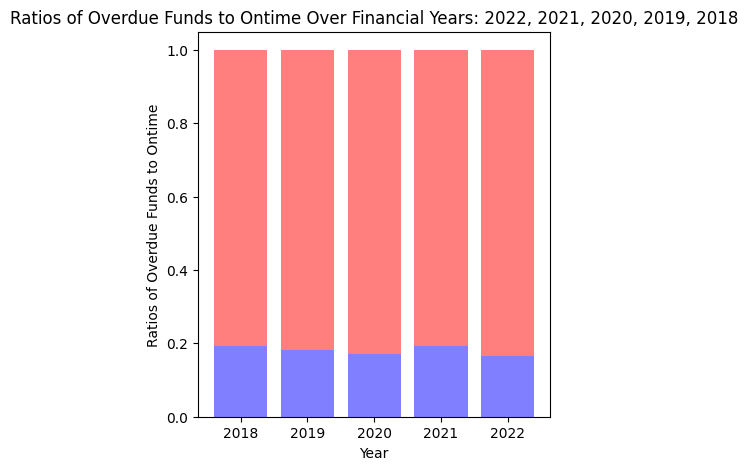

In [56]:
# plot
year = [2022, 2021, 2020, 2019, 2018]
data_overdue = [overdue2022, overdue2021, overdue2020, overdue2019, overdue2018]
data_ontime = [ontime2022, ontime2021, ontime2020,ontime2019, ontime2018 ]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.bar(year, data_overdue, label='Overdue', alpha=0.5, color='b')
ax1.bar(year, data_ontime, bottom = data_overdue, label='Ontime', alpha=0.5, color='r')
plt.sca(ax1)
ax2.remove()
plt.title('Ratios of Overdue Funds to Ontime Over Financial Years: 2022, 2021, 2020, 2019, 2018')
plt.xlabel('Year')
plt.ylabel('Ratios of Overdue Funds to Ontime')
plt.show()

In [14]:


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

df = pd.read_csv('2022.csv')
df1 = df[['ontime', 'subject']]
# ontime vs suject
def to_numerical(df):
    df['ontime'].replace(['ONTIME','OVERDUE'], [1,0], inplace=True)
    return df['ontime']



In [15]:
df1['ontime'] = to_numerical(df1)


/var/folders/28/k_0b83n90054zf3kf809sw6m0000gp/T/ipykernel_2412/2737795698.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ontime'].replace(['ONTIME','OVERDUE'], [1,0], inplace=True)
/var/folders/28/k_0b83n90054zf3kf809sw6m0000gp/T/ipykernel_2412/4241891690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['ontime'] = to_numerical(df1)


In [16]:
dfoverdue = df1[df1['ontime'] ==  0]
print(dfoverdue.groupby('subject')['ontime'].count())

subject
Animal Control                           4
Boston Police Department                 2
Inspectional Services                 3371
Mayor's 24 Hour Hotline                376
Parks & Recreation Department         2686
Property Management                   1621
Public Works Department              24426
Transportation - Traffic Division    11185
Name: ontime, dtype: int64


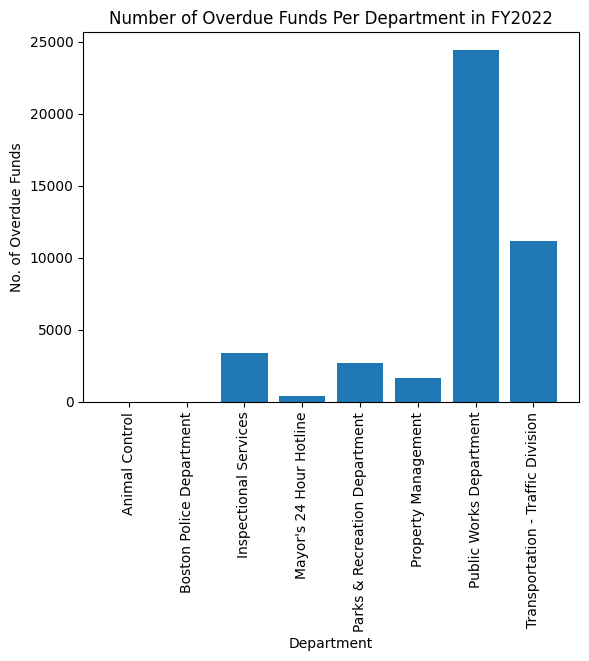

In [20]:
group = dfoverdue.groupby('subject')['ontime'].count()
total_overdue = dfoverdue['ontime'].count()
plt.bar(group.index, group)
plt.title('Number of Overdue Funds Per Department in FY2022')
plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('No. of Overdue Funds')
plt.show()

In [ ]:
""" total_overdue = dfoverdue['ontime'].count()
plt.bar(group.index, total_overdue)
plt.title('Number of Overdue Funds Per Department in FY2022 ')
plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('No. of Overdue Funds')
plt.show() """

""" dfSurvive = df[df['Survived'] ==  1]
group = dfSurvive.groupby('Title')['Survived'].count()
total_survived = dfSurvive['Survived'].count()
plt.bar(group.index, group.div(total_survived))
plt.show() """

In [21]:
df2 = df[['ontime', 'source']]
# ontime vs suject
def to_numerical(df):
    df['ontime'].replace(['ONTIME','OVERDUE'], [1,0], inplace=True)
    return df['ontime']

df2['ontime'] = to_numerical(df2)


/var/folders/28/k_0b83n90054zf3kf809sw6m0000gp/T/ipykernel_2412/1117913135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ontime'].replace(['ONTIME','OVERDUE'], [1,0], inplace=True)
/var/folders/28/k_0b83n90054zf3kf809sw6m0000gp/T/ipykernel_2412/1117913135.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ontime'] = to_numerical(df2)


In [24]:
dfoverdue = df2[df2['ontime'] ==  0]
print(dfoverdue.groupby('source')['ontime'].count())

source
Citizens Connect App    26411
City Worker App          3331
Constituent Call        12737
Employee Generated        734
Self Service              458
Name: ontime, dtype: int64


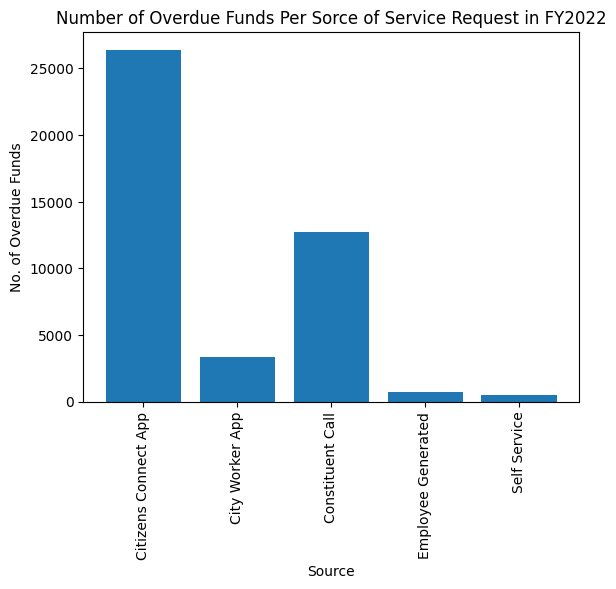

In [26]:
group = dfoverdue.groupby('source')['ontime'].count()
total_overdue = dfoverdue['ontime'].count()
plt.bar(group.index, group)
plt.title('Number of Overdue Funds Per Sorce of Service Request in FY2022')
plt.xticks(rotation=90)
plt.xlabel('Source')
plt.ylabel('No. of Overdue Funds')
plt.show()

<AxesSubplot: >

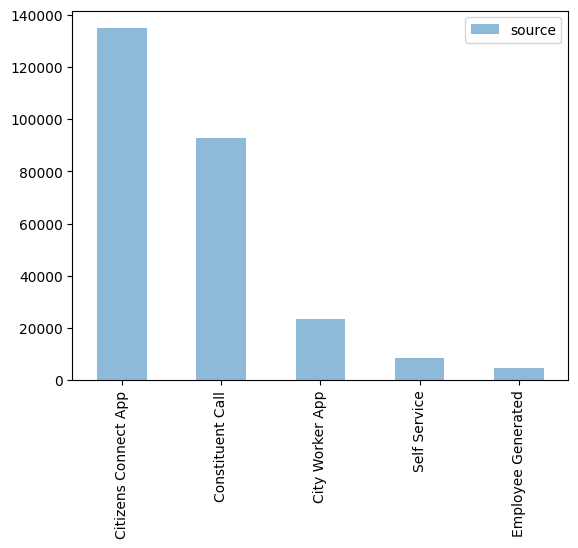

In [28]:
df2['source'].value_counts().nlargest(5).plot(kind='bar', legend=True, alpha=.5)

Text(0, 0.5, 'Number Overdue')

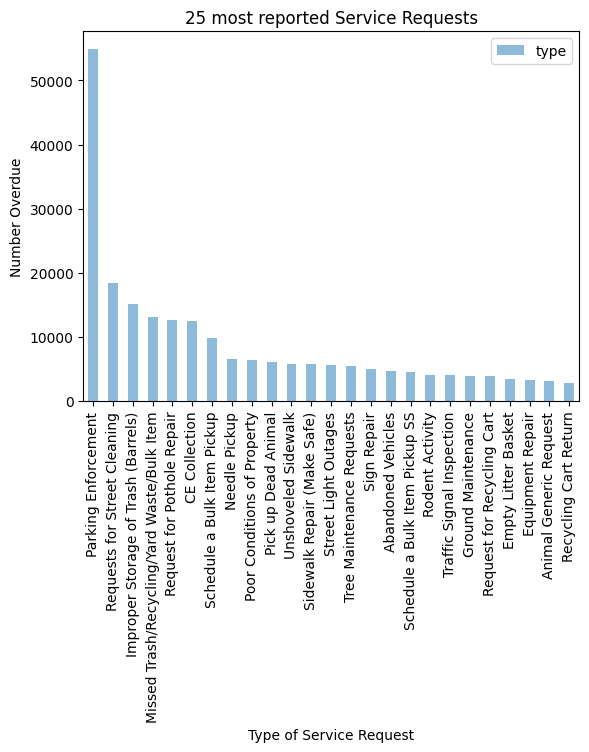

In [31]:
df['type'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title('25 most reported Service Requests')
plt.xlabel('Type of Service Request')
plt.ylabel('Number Overdue')


Text(0, 0.5, 'Number Overdue')

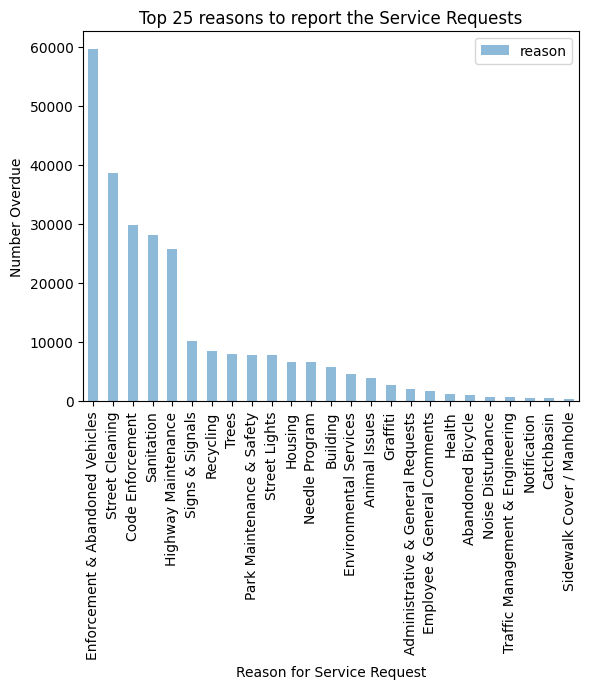

In [32]:
df['reason'].value_counts().nlargest(25).plot(kind='bar', legend=True, alpha=.5)
plt.title('Top 25 reasons to report the Service Requests')
plt.xlabel('Reason for Service Request')
plt.ylabel('Number Overdue')


In [37]:
df = pd.read_csv('2022.csv')

def to_numerical8(df):
    df['case_status'].replace(['Open','Closed'], [1,0], inplace=True)
    return df

def to_numerical(df):
    df['ontime'].replace(['ONTIME','OVERDUE'], [1,0], inplace=True)
    return df

df = to_numerical(df)
df = to_numerical8(df)


In [40]:
df = df[df['ontime']==0]
df.head(5)

case_enquiry_id              open_dt            target_dt  \
1      101004122734  2022-01-11 10:08:00  2022-07-10 10:08:25   
5      101004113311  2022-01-01 01:14:39  2022-02-15 01:14:45   
7      101004113559  2022-01-01 14:18:00  2022-01-04 08:30:00   
8      101004113576  2022-01-01 14:35:00  2022-01-19 08:30:00   
26     101004113788  2022-01-02 06:49:00  2022-01-04 08:30:00   

              closed_dt  ontime  case_status  \
1                   NaN       0            1   
5   2022-04-02 13:01:14       0            0   
7                   NaN       0            1   
8   2022-04-14 11:32:45       0            0   
26  2022-01-05 17:14:00       0            0   

                                       closure_reason  \
1                                                       
5   Case Closed. Closed date : Sat Apr 02 13:01:14...   
7                                                       
8   Case Closed. Closed date : 2022-04-14 11:32:45...   
26  Case Closed. Closed date : 2022-01-05 17:14:00...   

                              case_title                            subject  \
1   DISPATCHED Squalid Living Conditions              Inspectional Services   
5               General Lighting Request            Public Works Department   
7            Sidewalk Repair (Make Safe)            Public Works Department   
8                     Abandoned Vehicles  Transportation - Traffic Division   
26                         CE Collection            Public Works Department   

                              reason  ... police_district   neighborhood  \
1                            Housing  ...              D4         Boston   
5                      Street Lights  ...             E13  Jamaica Plain   
7                Highway Maintenance  ...              A1    Beacon Hill   
8   Enforcement & Abandoned Vehicles  ...              E5     Roslindale   
26                   Street Cleaning  ...              D4       Back Bay   

   neighborhood_services_district     ward precinct  \
1                               6       04     0402   
5                              11       19     1903   
7                              14   Ward 5     0511   
8                              10  Ward 20     2002   
26                             14        5     0509   

                                 location_street_name location_zipcode  \
1                                 70 Saint Botolph St           2116.0   
5               INTERSECTION Boylston St & Moraine St              NaN   
7                             108-110 Mount Vernon St           2108.0   
8                                          3 Havey St           2131.0   
26  INTERSECTION Public Alley No. 414 & Public All...              NaN   

   latitude longitude                source  
1   42.3455  -71.0797      Constituent Call  
5   42.3594  -71.0587       City Worker App  
7   42.3578  -71.0696  Citizens Connect App  
8   42.2836  -71.1359      Constituent Call  
26  42.3594  -71.0587       City Worker App  

[5 rows x 29 columns]

In [42]:
dfoverdue = df[df['case_status'] ==  0]
print(dfoverdue.groupby('subject')['case_status'].count())

subject
Animal Control                           4
Boston Police Department                 2
Inspectional Services                 1420
Mayor's 24 Hour Hotline                 46
Parks & Recreation Department         1376
Property Management                    978
Public Works Department              11830
Transportation - Traffic Division     8625
Name: case_status, dtype: int64


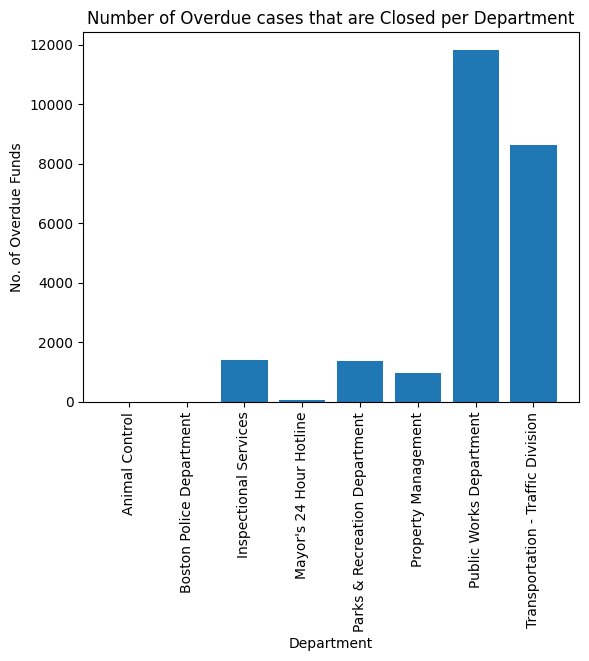

In [43]:
group = dfoverdue.groupby('subject')['case_status'].count()
total_overdue = dfoverdue['case_status'].count()
plt.bar(group.index, group)
plt.title('Number of Overdue cases that are Closed per Department')
plt.xticks(rotation=90)
plt.xlabel('Department')
plt.ylabel('No. of Overdue Funds')
plt.show()

In [ ]:
df['case_status'].value_counts().plot(kind='bar', legend=True, alpha=.5)
plt.title('Number of Overdue cases that are Closed per Department')
plt.xlabel('Department')
plt.ylabel('Number Overdue')